# Compare Generated Images to Hires Images

In [1]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

---

In [2]:
def get_2d_vector(channel_vector, min_value, max_value):
    """
    Returns a (256,256) float vector ranging from [min_value, max_value].
    
    Arguments:
        channel_vector: a channel with values between [0, 255] 
                        extracted from the red channel of a PIL Image.
        min_value: integer, the minimum value of the entire distribution of the vector to return
        max_value: integer, the maximum value of the entire distribution of the vector to return
    """
    return channel_vector / 256 * (max_value - min_value) + min_value

In [18]:
def get_temperature_from_rgb_image(pil_image):
    """
    Returns a 2d vector (256,256) of temperature value [-50, 50] extracted from the red channel of given image
    
    Arguments:
        pil_image: the PIL Image to extract the red channel from
    """
    img_channels = np.array(pil_image)
    return get_2d_vector(img_channels[:,:,0], -50, 50)

In [16]:
def show_images(img1, img2, img3):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,15))
    ax1.imshow(img1)
    ax1.set_title('Low Resolution')

    ax2.imshow(img2)
    ax2.set_title('Generated Image')

    ax3.imshow(img3)
    ax3.set_title('High Resolution')

    plt.show()

In [19]:
def show_comparaison(lowres_test, hires_test, dates, gen_image_folder, display_image_count=3):
    """
    """
    for i in range(display_image_count):
        lowres = lowres_test[i,5,:,:]
        hires = hires_test[i,0,:,:]
        
        # generated image
        filename = gen_image_folder + '/' + dates[i].decode('UTF-8')+'.png'
        generated_image = Image.open(filename)
        generated_temperature = get_temperature_from_rgb_image(generated_image)

        show_images(lowres, generated_temperature, hires)

---

In [6]:
lowres_test= np.load('../data/input_test_set.npy')
hires_test= np.load('../data/label_test_set.npy')
date_test = np.load('../data/date_test_set.npy')

---

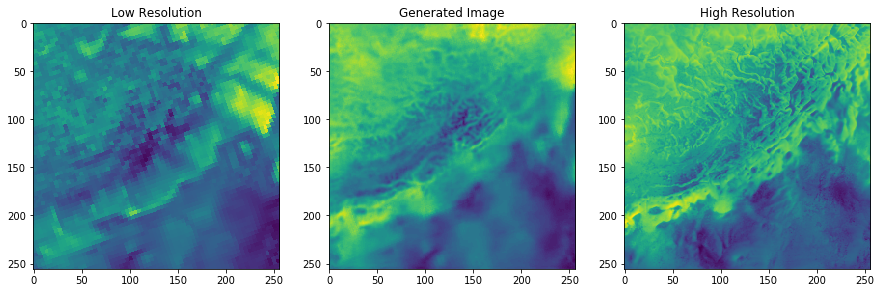

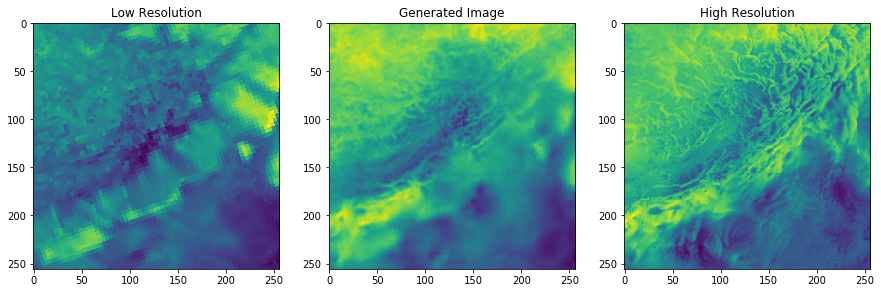

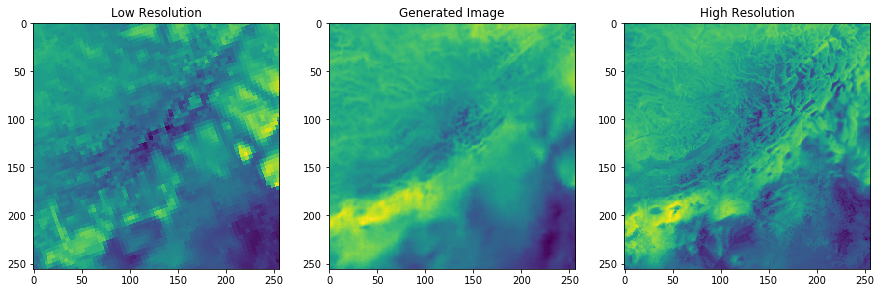

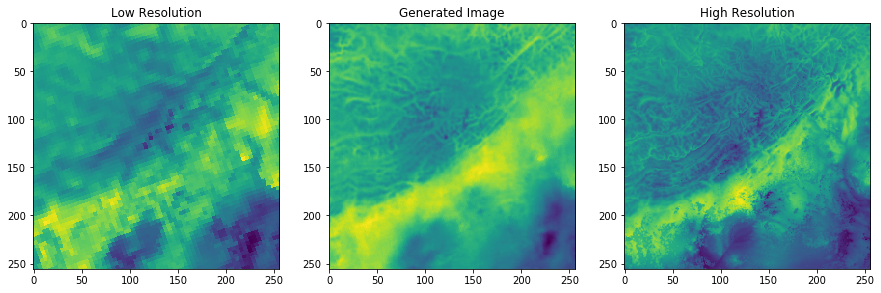

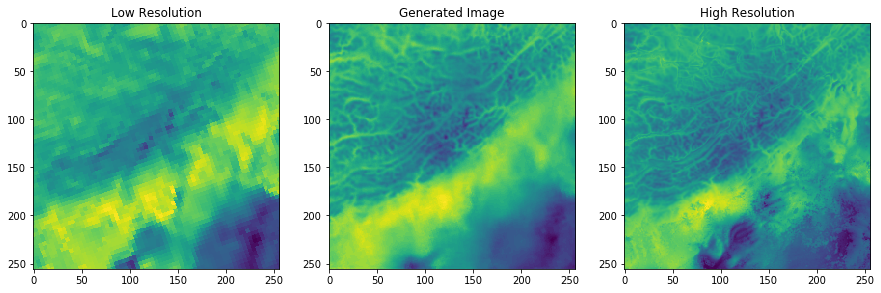

In [23]:
show_comparaison(lowres_test, hires_test, date_test, '../images/image_gen', display_image_count=5)